In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time
import math
import numpy as np
import pylab as py
import time
import random
from matplotlib import animation, rc
from IPython.display import HTML

# Getting differential Eqn for $\theta_1$ and $\theta_2$

In [2]:
#inverse of a 2X2 matrix
def a_inv(A): # A is a  2X2 matrix with non zero determinant
    a=A[0][0]
    b=A[0][1]
    c=A[1][0]
    d=A[1][1]
    det=a*d-b*c
    #now inverse
    B= np.zeros((2,2))
    B[0][0]=d/det
    B[0][1]=-b/det
    B[1][0]=-c/det
    B[1][1]=a/det
    return B

In [3]:
###Getting DE for for both variables
# [x1 x2]>>>>>X for theta1
# x1 >>>>theta1 and x2 >>>> theta1 dot
# [y1 y2]>>>>>Y for theta2
# y1 >>>>theta2 and y2 >>>> theta2 dot


def theta_double_dot(X,Y):
    theta1,theta1_dot=X
    theta2,theta2_dot=Y
    #A.Theta_double dot= B
    ###A
    A=np.zeros((2,2))
    A[0,0]=(m1+m2)*l1
    A[1,0]=m2*l1*np.cos(theta1-theta2)
    A[0,1]=m2*l2*np.cos(theta1-theta2)
    A[1,1]=m2*l2
    ##inverse of A
    Ai=a_inv(A)
    # Column vector B
    B=np.zeros(2)
    B[0]=-(g*(m1+m2)*np.sin(theta1)+m2*l2*(theta2_dot**2)*np.sin(theta1-theta2))
    B[1]=(m2*l1*(theta1_dot**2)*np.sin(theta1-theta2)-m2*g*np.sin(theta2))
    #### Now Ai.B
    #Theta_double_dot=[Theta1_double_dot,Theta2_double_dot]
    Theta_double_dot=np.dot(Ai,B)
    return Theta_double_dot

# Creating F for rk4

In [4]:
def F(theta_double_dot,X,Y):
    theta1_dot=X[1]
    theta2_dot=Y[1]
    omega1_dot,omega2_dot=theta_double_dot(X,Y)
    f=np.array([[theta1_dot,omega1_dot],[theta2_dot,omega2_dot]])
    return f

In [5]:
# X_0 is a column vector if initial values  X_0=[theta1,theta1_dot]^T
# Y_0 is a column vector if initial values  Y_0=[theta2,theta2_dot]^T
def rk_4(X_0,Y_0,a,b,h,theta_double_dot,F): 
    M=int((b-a)/h)
    t=np.linspace(a,b,M+1)
    X=X_0
    Y=Y_0
    for j in range(M):
        x=np.array([X[0][-1],X[1][-1]])
        y=np.array([Y[0][-1],Y[1][-1]])
        #print('x is : ',x)
        #print('y is : ',y)
        F1=h*F(theta_double_dot,x,y)
        #print(F1)
        F2=h*F(theta_double_dot,x+F1[0]/2,y+F1[1]/2)
        F3=h*F(theta_double_dot,x+F2[0]/2,y+F2[1]/2)
        F4=h*F(theta_double_dot,x+F3[0],y+F3[1])
        X[0].append(X[0][-1]+((F1+F2+F3+F4)[0][0])/6)
        X[1].append(X[1][-1]+((F1+F2+F3+F4)[0][1])/6)
        Y[0].append(Y[0][-1]+((F1+F2+F3+F4)[1][0])/6)
        Y[1].append(Y[1][-1]+((F1+F2+F3+F4)[1][1])/6)
    return np.array(t),np.array(X[0]),np.array(Y[0]),np.array(X[1]),np.array(Y[1])
##Returns time,theta1,theta2,omega_1,omega_2

# Giving Initial Points

# Small angles

In [6]:
###Getting DE for for both variables
# [u1 v1]>>>>>X0 for theta1
# u1 is theta1 and v1 is theta1 dot
# [u2 v2]>>>>>Y0 for theta2
# u2 is theta2 and v2 is theta_2 dott

#define constants:
m1=4 # mass of first pendulum
m2=2.5 # mass of second pendulum
l1=1.6 # lenghth of first pendulum
l2=1 # length of second pendulum
g=9.8 # gravitational constant

In [7]:
# let's convert angle in degrees to radian
def deg_to_rad(angle_deg):
    angle_rad=angle_deg*np.pi/180
    return angle_rad 

In [8]:
#For first double pendulum
start=time.time()
u0 = [deg_to_rad(10), deg_to_rad(5), deg_to_rad(8), deg_to_rad(2)]  # list of  of initial values
X_0=[[u0[0]],[u0[1]]] # initial values of for first pendulum [theta_1,omega_1]
Y_0=[[u0[2]],[u0[3]]] ## initial values of for second pendulum [theta_2,omega_2]

a=0 #initial time
b=25 #final time
h=1/3000 # step size

err=deg_to_rad(random.uniform(0.01,0.02)) # creating slight change in initial condition
X_0=[[u0[0]+err],[u0[1]+err]]
Y_0=[[u0[2]+err],[u0[3]+err]]
(t1,theta11,theta21,omega_11,omega_21)=rk_4(X_0,Y_0,a,b,h,theta_double_dot,F)

end=(time.time())

print('It took {} seconds'.format(end-start))

It took 12.878623008728027 seconds


In [9]:
#For second double pendulum
#For first double pendulum
start=time.time()
u0 = [deg_to_rad(10), deg_to_rad(5), deg_to_rad(8), deg_to_rad(2)]  # list of  of initial values
X_0=[[u0[0]],[u0[1]]] # initial values of for first pendulum [theta_1,omega_1]
Y_0=[[u0[2]],[u0[3]]] ## initial values of for second pendulum [theta_2,omega_2]

a=0 #initial time
b=25 #final time
h=1/3000 # step size

err=deg_to_rad(random.uniform(0.01,0.02)) # creating slight change in initial condition
X_0=[[u0[0]+err],[u0[1]+err]]
Y_0=[[u0[2]+err],[u0[3]+err]]
(t2,theta12,theta22,omega_12,omega_22)=rk_4(X_0,Y_0,a,b,h,theta_double_dot,F)

end=(time.time())

print('It took {} seconds'.format(end-start))

It took 13.016028642654419 seconds


# Position of each mass for small values of $\theta_1$ and $\theta_2$
 let's get coordinates

In [10]:
start=time.time()
#for first double pendulum
x11=l1*np.sin(theta11)
y11=-l1*(np.cos(theta11))
x21=(l1*np.sin(theta11)+l2*np.sin(theta21))
y21=-(l1*np.cos(theta11)+l2*np.cos(theta21))

#for second double pendulum
x12=l1*np.sin(theta12)
y12=-l1*(np.cos(theta12))
x22=(l1*np.sin(theta12)+l2*np.sin(theta22))
y22=-(l1*np.cos(theta12)+l2*np.cos(theta22))
end=(time.time())
print('It took {} seconds'.format(end-start))

It took 0.020148754119873047 seconds


# Now, we have all necessary values to generate plots and simulation

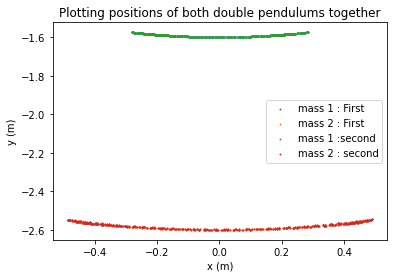

In [11]:
#Since we have the coordinate of the points
# taking 20 points per second for better visualisation
n=len(t1)
m=(b-a)*20
n1=n//m
##First double pendulum
#Now,desired x,y
x11i=x11[::n1]
y11i=y11[::n1]
x21i=x21[::n1]
y21i=y21[::n1]
t1i=t1[::n1]
#Making scatter plot 
plt.scatter(x11i,y11i,label = 'mass 1 : First',s=0.8)
plt.scatter(x21i,y21i,label = 'mass 2 : First ',s=0.8)

plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')



##second double pendulum
#Now,desired x,y
x12i=x12[::n1]
y12i=y12[::n1]
x22i=x22[::n1]
y22i=y22[::n1]
t2i=t2[::n1]
#Making scatter plot 
plt.scatter(x12i,y12i,label = 'mass 1 :second',s=0.8)
plt.scatter(x22i,y22i,label = 'mass 2 : second',s=0.8)

plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Plotting positions of both double pendulums together')


plt.show()
    

# Now let's plot $\theta_1$ vs $t$ for both pendulum in same plot

In [12]:
#let's convert theta in range 0 to 2*pi
def convert_it(theta):
    final=((theta)%(2*np.pi))-np.pi
    return final

In [13]:
theta11i=(theta11[::n1])
theta12i=(theta12[::n1])

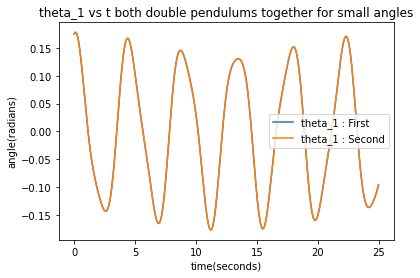

In [14]:
#First double pendulum
plt.plot(t1i,theta11i,label = 'theta_1 : First')
plt.legend()
plt.xlabel('time')
plt.ylabel('angle')
#Second Double pendulum
plt.plot(t2i,theta12i,label = 'theta_1 : Second')
plt.legend()
plt.xlabel('time(seconds)')
plt.ylabel('angle(radians)')
plt.title('theta_1 vs t both double pendulums together for small angles')
plt.show()

# Now let's plot $\theta_2$ vs $t$ for both pendulum in same plot

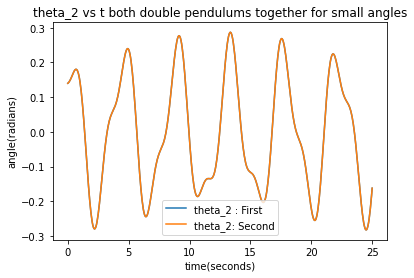

In [15]:
theta21i=theta21[::n1]
theta22i=theta22[::n1]
#First double pendulum
plt.plot(t2i,theta21i,label = 'theta_2 : First')
plt.legend()
plt.xlabel('time')
plt.ylabel('angle')
#Second Double pendulum
plt.plot(t2i,theta22i,label = 'theta_2: Second')
plt.legend()
plt.xlabel('time(seconds)')
plt.ylabel('angle(radians)')
plt.title('theta_2 vs t both double pendulums together for small angles')
plt.show()

# Now, Let's create gif and videos for two double pendulum

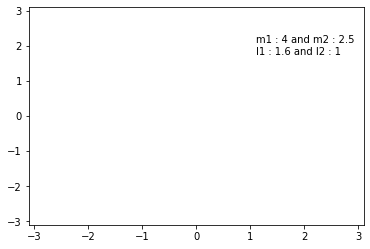

In [16]:
fig = plt.figure()
ax = plt.axes(xlim=(-l1-l2-0.5, l1+l2+0.5), ylim=(-l1-l2-0.5, l1+l2+0.5))
plt.text(l1+l2-1.5,l1+l2-0.5,'m1 : {} and m2 : {}'.format(m1,m2))
plt.text(l1+l2-1.5,l1+l2-0.85,'l1 : {} and l2 : {}'.format(l1,l2))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")

line11, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 1
line12, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 2

line21, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 1
line22, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 2

line31, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line32, = ax.plot([], [], color='k', linestyle='-', linewidth=2)


line41, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line42, = ax.plot([], [], color='k', linestyle='-', linewidth=2)


line51, = ax.plot([], [], 'o', color='k', markersize = 10)
line52, = ax.plot([], [], 'o', color='k', markersize = 10)


time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [17]:
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

[]

In [18]:
# animation function.  This is called sequentially
def animate(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = len(t1i)               # length of motion trail of weight 1 
    trail2 = len(t1i)              # length of motion trail of weight 2
    
    dt = t1i[2]-t1i[1]          # time step
    # marker + line of first weight
    line11.set_data(x11i[i:max(1,i-trail1):-1], y11i[i:max(1,i-trail1):-1])
    line12.set_data(x12i[i:max(1,i-trail1):-1], y12i[i:max(1,i-trail1):-1])


    # marker + line of the second weight   
    line21.set_data(x21i[i:max(1,i-trail2):-1], y21i[i:max(1,i-trail2):-1]) 
    line22.set_data(x22i[i:max(1,i-trail2):-1], y22i[i:max(1,i-trail2):-1])
 
    
    # line connecting weight 2 to weight 1 
    line31.set_data([x11i[i], x21i[i]], [y11i[i], y21i[i]])
    line32.set_data([x12i[i], x22i[i]], [y12i[i], y22i[i]])
 

    # line connecting origin to weight 1 
    line41.set_data([x11i[i], 0], [y11i[i],0]) 
    line42.set_data([x12i[i], 0], [y12i[i],0])
                  
    
    #*****************************
    line51.set_data([0, 0], [0, 0])
    line52.set_data([0, 0], [0, 0])
 
    #******
    time_string.set_text(time_template % (i*dt))
    ###################################
    f1=(line31, line41,line51,line11, line21, time_string)
    f2=(line32, line42,line52,line12, line22, time_string)

    return  f1

In [19]:
Nt=len(t1i)
anim = animation.FuncAnimation(fig, animate, init_func=None,
                               frames=Nt, interval=1000*(t1i[2]-t1i[1])*0.8, blit=True)

# Comment out the following lines if you do not want to save the animation to file
#.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('two_double_pendulum_animation_small angle_full_trail.gif', fps=1.0/(t1i[2]-t1i[1]), writer = 'pillow')

plt.show()

# Now let's repeat the same for large angles

In [20]:
#For first double pendulum
start=time.time()
u0 = [deg_to_rad(130), deg_to_rad(5), deg_to_rad(8), deg_to_rad(115)]  # list of  of initial values
X_0=[[u0[0]],[u0[1]]] # initial values of for first pendulum [theta_1,omega_1]
Y_0=[[u0[2]],[u0[3]]] ## initial values of for second pendulum [theta_2,omega_2]

a=0 #initial time
b=25 #final time
h=1/3000 # step size

err=deg_to_rad(random.uniform(0.01,0.02)) # creating slight change in initial condition
X_0=[[u0[0]+err],[u0[1]+err]]
Y_0=[[u0[2]+err],[u0[3]+err]]
(t1,theta11,theta21,omega_11,omega_21)=rk_4(X_0,Y_0,a,b,h,theta_double_dot,F)

end=(time.time())

print('It took {} seconds'.format(end-start))

It took 13.16275930404663 seconds


In [21]:
#For second double pendulum
#For first double pendulum
start=time.time()
u0 = [deg_to_rad(130), deg_to_rad(5), deg_to_rad(8), deg_to_rad(115)]  # list of  of initial values
X_0=[[u0[0]],[u0[1]]] # initial values of for first pendulum [theta_1,omega_1]
Y_0=[[u0[2]],[u0[3]]] ## initial values of for second pendulum [theta_2,omega_2]

a=0 #initial time
b=25 #final time
h=1/3000 # step size

err=deg_to_rad(random.uniform(0.01,0.02)) # creating slight change in initial condition
X_0=[[u0[0]+err],[u0[1]+err]]
Y_0=[[u0[2]+err],[u0[3]+err]]
(t2,theta12,theta22,omega_12,omega_22)=rk_4(X_0,Y_0,a,b,h,theta_double_dot,F)

end=(time.time())

print('It took {} seconds'.format(end-start))

It took 12.999138116836548 seconds


In [22]:
print

<function print>

In [23]:
start=time.time()
#for first double pendulum
x11=l1*np.sin(theta11)
y11=-l1*(np.cos(theta11))
x21=(l1*np.sin(theta11)+l2*np.sin(theta21))
y21=-(l1*np.cos(theta11)+l2*np.cos(theta21))

#for second double pendulum
x12=l1*np.sin(theta12)
y12=-l1*(np.cos(theta12))
x22=(l1*np.sin(theta12)+l2*np.sin(theta22))
y22=-(l1*np.cos(theta12)+l2*np.cos(theta22))
end=(time.time())
print('It took {} seconds'.format(end-start))

It took 0.023988723754882812 seconds


In [24]:
Nt=len(t1i)
anim = animation.FuncAnimation(fig, animate, init_func=None,
                               frames=Nt, interval=1000*(t1i[2]-t1i[1])*0.8, blit=True)

# Comment out the following lines if you do not want to save the animation to file
#.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('two_double_pendulum_animation_large angle_full_trail.gif', fps=1.0/(t1i[2]-t1i[1]), writer = 'pillow')

plt.show()

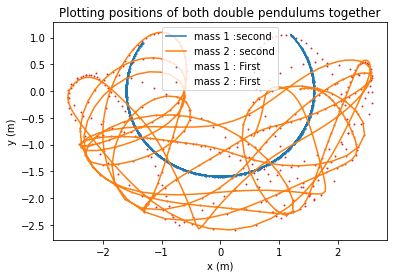

In [25]:
#Since we have the coordinate of the points
# taking 20 points per second for better visualisation
n=len(t1)
m=(b-a)*20
n1=n//m
##First double pendulum
#Now,desired x,y
x11i=x11[::n1]
y11i=y11[::n1]
x21i=x21[::n1]
y21i=y21[::n1]
t1i=t1[::n1]
#Making scatter plot 
plt.scatter(x11i,y11i,label = 'mass 1 : First',s=0.8)
plt.scatter(x21i,y21i,label = 'mass 2 : First ',s=0.8,c='#d62728')

plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')



##second double pendulum
#Now,desired x,y
x12i=x12[::n1]
y12i=y12[::n1]
x22i=x22[::n1]
y22i=y22[::n1]
t2i=t2[::n1]
#Making scatter plot 
plt.plot(x12i,y12i,label = 'mass 1 :second')
plt.plot(x22i,y22i,label = 'mass 2 : second')

plt.legend()
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Plotting positions of both double pendulums together')


plt.show()

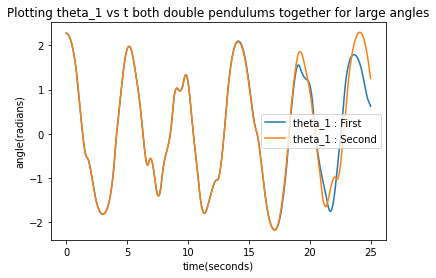

In [26]:
theta11i=(theta11[::n1])
theta12i=(theta12[::n1])
#First double pendulum
plt.plot(t1i,theta11i,label = 'theta_1 : First')
plt.legend()
plt.xlabel('time')
plt.ylabel('angle')
#Second Double pendulum
plt.plot(t2i,theta12i,label = 'theta_1 : Second')
plt.legend()
plt.xlabel('time(seconds)')
plt.ylabel('angle(radians)')
plt.title('Plotting theta_1 vs t both double pendulums together for large angles')
plt.show()

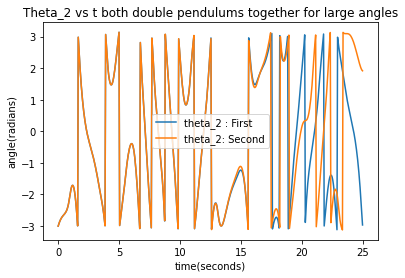

In [27]:
#theta21i=(theta21[::n1])
#theta22i=(theta22[::n1])


theta21i=convert_it(theta21[::n1])
theta22i=convert_it(theta22[::n1])
#First double pendulum
plt.plot(t2i,theta21i,label = 'theta_2 : First')
plt.legend()
plt.xlabel('time')
plt.ylabel('angle')
#Second Double pendulum
plt.plot(t2i,theta22i,label = 'theta_2: Second')
plt.legend()
plt.xlabel('time(seconds)')
plt.ylabel('angle(radians)')
plt.title('Theta_2 vs t both double pendulums together for large angles')
plt.show()

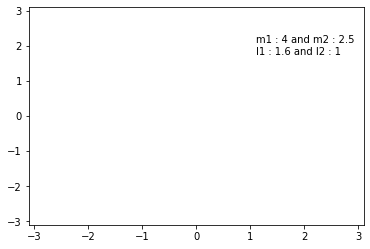

In [28]:
fig = plt.figure()
ax = plt.axes(xlim=(-l1-l2-0.5, l1+l2+0.5), ylim=(-l1-l2-0.5, l1+l2+0.5))
plt.text(l1+l2-1.5,l1+l2-0.5,'m1 : {} and m2 : {}'.format(m1,m2))
plt.text(l1+l2-1.5,l1+l2-0.85,'l1 : {} and l2 : {}'.format(l1,l2))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")

line11, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 1
line12, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 2

line21, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 1
line22, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 2

line31, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line32, = ax.plot([], [], color='k', linestyle='-', linewidth=2)


line41, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line42, = ax.plot([], [], color='k', linestyle='-', linewidth=2)


line51, = ax.plot([], [], 'o', color='k', markersize = 10)
line52, = ax.plot([], [], 'o', color='k', markersize = 10)


time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [29]:
Nt=len(t1i)
anim = animation.FuncAnimation(fig, animate, init_func=None,
                               frames=Nt, interval=1000*(t1i[2]-t1i[1])*0.8, blit=True)

# Comment out the following lines if you do not want to save the animation to file
#.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('two_double_pendulum_animation_large angle_full_trail.gif', fps=1.0/(t1i[2]-t1i[1]), writer = 'pillow')

plt.show()

# Three double pendulum together

In [30]:
#define constants:
m1=2 # mass of first pendulum
m2=1 # mass of second pendulum
l1=1.4 # lenghth of first pendulum
l2=1 # length of second pendulum
g=9.8 # gravitational constant


u0 = [deg_to_rad(100), deg_to_rad(5), deg_to_rad(148), deg_to_rad(2)]  # list of  of initial values
X_0=[[u0[0]],[u0[1]]] # initial values of for first pendulum [theta_1,omega_1]
Y_0=[[u0[2]],[u0[3]]] ## initial values of for second pendulum [theta_2,omega_2]

a=0 #initial time
b=25 #final time
h=1/3000 # step size
X_01=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_01=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]

X_02=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_02=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]

X_03=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_03=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]
a=0
b=25
h=0.001
(t1,theta11,theta21,omega11,omega21)=rk_4(X_01,Y_01,a,b,h,theta_double_dot,F)
(t2,theta12,theta22,omega12,omega22)=rk_4(X_02,Y_02,a,b,h,theta_double_dot,F)
(t3,theta13,theta23,omega13,omega23)=rk_4(X_03,Y_03,a,b,h,theta_double_dot,F)

In [31]:
#First pendulum
x11=(l1*(np.sin(theta11)))
y11=(-l1*(np.cos(theta11)))
x21=((l1*np.sin(theta11)+l2*np.sin(theta21)))
y21=(-(l1*np.cos(theta11)+l2*np.cos(theta21)))

#Second pendulum
x12=(l1*(np.sin(theta12)))
y12=(-l1*(np.cos(theta12)))
x22=((l1*np.sin(theta12)+l2*np.sin(theta22)))
y22=(-(l1*np.cos(theta12)+l2*np.cos(theta22)))

#Third pendulum
x13=(l1*(np.sin(theta13)))
y13=(-l1*(np.cos(theta13)))
x23=((l1*np.sin(theta13)+l2*np.sin(theta23)))
y23=(-(l1*np.cos(theta13)+l2*np.cos(theta23)))

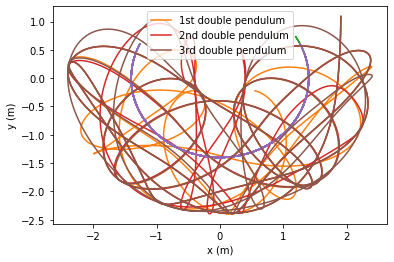

In [32]:
plt.plot(x11,y11)
plt.plot(x21,y21,label='1st double pendulum')

plt.plot(x12,y12)
plt.plot(x22,y22,label='2nd double pendulum')

plt.plot(x13,y13)
plt.plot(x23,y23,label='3rd double pendulum')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.legend()

In [33]:
#let's do slicing of the array to get desired points
#print(b-a) --total time interval
n=len(t1)
m=(b-a)*20
n1=n//m

#Now,desired x,y
x11i=x11[::n1]
y11i=y11[::n1]
x21i=x21[::n1]
y21i=y21[::n1]
t=t1[::n1]

x12i=x12[::n1]
y12i=y12[::n1]
x22i=x22[::n1]
y22i=y22[::n1]

x13i=x13[::n1]
y13i=y13[::n1]
x23i=x23[::n1]
y23i=y23[::n1]

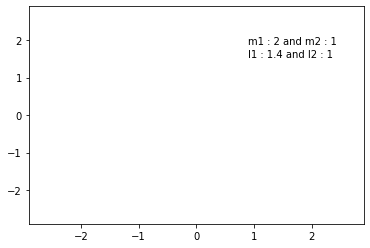

In [34]:
fig = plt.figure()
ax = plt.axes(xlim=(-l1-l2-0.5, l1+l2+0.5), ylim=(-l1-l2-0.5, l1+l2+0.5))
plt.text(l1+l2-1.5,l1+l2-0.5,'m1 : {} and m2 : {}'.format(m1,m2))
plt.text(l1+l2-1.5,l1+l2-0.85,'l1 : {} and l2 : {}'.format(l1,l2))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")

line11, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 1
line12, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 2
line13, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 3

line21, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 1
line22, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 2
line23, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 3

line31, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line32, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line33, = ax.plot([], [], color='k', linestyle='-', linewidth=2)

line41, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line42, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line43, = ax.plot([], [], color='k', linestyle='-', linewidth=2)

line51, = ax.plot([], [], 'o', color='k', markersize = 10)
line52, = ax.plot([], [], 'o', color='k', markersize = 10)
line53, = ax.plot([], [], 'o', color='k', markersize = 10) 

time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [35]:
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks

[]

In [36]:
# animation function.  This is called sequentially
def animate(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = len(t)             # length of motion trail of weight 1 
    trail2 = len(t)              # length of motion trail of weight 2
    
    dt = t[2]-t[1]          # time step
    # marker + line of first weight
    line11.set_data(x11i[i:max(1,i-trail1):-1], y11i[i:max(1,i-trail1):-1])
    line12.set_data(x12i[i:max(1,i-trail1):-1], y12i[i:max(1,i-trail1):-1])
    line13.set_data(x13i[i:max(1,i-trail1):-1], y13i[i:max(1,i-trail1):-1])

    # marker + line of the second weight   
    line21.set_data(x21i[i:max(1,i-trail2):-1], y21i[i:max(1,i-trail2):-1]) 
    line22.set_data(x22i[i:max(1,i-trail2):-1], y22i[i:max(1,i-trail2):-1])
    line23.set_data(x23i[i:max(1,i-trail2):-1], y23i[i:max(1,i-trail2):-1])  
    
    # line connecting weight 2 to weight 1 
    line31.set_data([x11i[i], x21i[i]], [y11i[i], y21i[i]])
    line32.set_data([x12i[i], x22i[i]], [y12i[i], y22i[i]])
    line33.set_data([x13i[i], x23i[i]], [y11i[i], y23i[i]])  

    # line connecting origin to weight 1 
    line41.set_data([x11i[i], 0], [y11i[i],0]) 
    line42.set_data([x12i[i], 0], [y12i[i],0])
    line43.set_data([x13i[i], 0], [y13i[i],0])                 
    
    #*****************************
    line51.set_data([0, 0], [0, 0])
    line52.set_data([0, 0], [0, 0])
    line53.set_data([0, 0], [0, 0])
    #******
    time_string.set_text(time_template % (i*dt))
    ###################################
    f1=(line31, line41,line51,line11, line21, time_string)
    f2=(line32, line42,line52,line12, line22, time_string)
    f3=(line33, line43,line53,line13, line23, time_string)
    return  f1

In [37]:
Nt=len(t)
anim = animation.FuncAnimation(fig, animate, init_func=None,
                               frames=Nt, interval=1000*(t1[2]-t1[1])*0.8, blit=True)

# Comment out the following lines if you do not want to save the animation to file
#anim.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('three_double_pendulum_animation_final_1_full_trail.gif', fps=1.0/(t1[2]-t1[1]), writer = 'pillow')

plt.show()

# 50 double pendulums

In [53]:
#define constants:
m1=2 # mass of first pendulum
m2=1 # mass of second pendulum
l1=1.4 # lenghth of first pendulum
l2=1 # length of second pendulum
g=9.8 # gravitational constant


u0 = [deg_to_rad(100), deg_to_rad(5), deg_to_rad(148), deg_to_rad(2)]  # list of  of initial values
X_0=[[u0[0]],[u0[1]]] # initial values of for first pendulum [theta_1,omega_1]
Y_0=[[u0[2]],[u0[3]]] ## initial values of for second pendulum [theta_2,omega_2]


X_01=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_01=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]

X_02=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_02=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]

X_03=[[u0[0]+deg_to_rad(random.uniform(0.01,0.02))],[u0[1]]]
Y_03=[[u0[2]+deg_to_rad(random.uniform(0.01,0.02))],[u0[3]]]
a=0 #initial time
b=25 #final time
h=1/30 # step size
(t1,theta11,theta21,omega11,omega21)=rk_4(X_01,Y_01,a,b,h,theta_double_dot,F)
(t2,theta12,theta22,omega12,omega22)=rk_4(X_02,Y_02,a,b,h,theta_double_dot,F)
(t3,theta13,theta23,omega13,omega23)=rk_4(X_03,Y_03,a,b,h,theta_double_dot,F)

#######################################################
#N=2 #####Number of double pendulums
N=int(input('How many double pendulums ? : '))
Ti=[]
Theta1i=[]
Theta2i=[]
Omega1i=[]
Omega2i=[]
for n in range (N):
    err=deg_to_rad(random.uniform(0.1,0.2)) # random error in initial conditions
    X_0i=[[u0[0]+err],[u0[1]]]
    Y_0i=[[u0[2]+err],[u0[3]]]
    (ti1,theta1i,theta2i,omega1i,omega2i)=rk_4(X_0i,Y_0i,a,b,h,theta_double_dot,F)
    Ti.append(ti1)
    Theta1i.append(theta1i)
    Theta2i.append(theta2i)
    Omega1i.append(omega1i)
    Omega2i.append(omega2i)

###################################################################################
X1i=[]
Y1i=[]
X2i=[]
Y2i=[]

for i in range(N):
    X1i.append(l1*(np.sin(Theta1i[i])))
    Y1i.append(-l1*(np.cos(Theta1i[i])))
    X2i.append((l1*np.sin(Theta1i[i])+l2*np.sin(Theta2i[i])))
    Y2i.append(-(l1*np.cos(Theta1i[i])+l2*np.cos(Theta2i[i])))
###########################################################################################
#for i in range(N):
    #plt.plot(X1i[i],Y1i[i])
    #plt.plot(X2i[i],Y2i[i])
#plt.xlabel('x (m)')
#plt.ylabel('y (m)')
#plt.legend()

How many double pendulums ? : 2


Text(0, 0.5, 'y (m)')

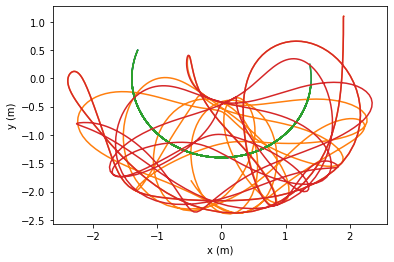

In [54]:
for i in range(N):
    plt.plot(X1i[i],Y1i[i])
    plt.plot(X2i[i],Y2i[i])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.legend()

In [55]:
#let's do slicing of the array to get desired points
#print(b-a) --total time interval
n=len(t1)
m=(b-a)*5
n1=n//m

x1i=[]
y1i=[]
x2i=[]
y2i=[]
ti=[]
for i in range(N):
#Now,desired x,y
    x1i.append(X1i[i][::n1])
    y1i.append(Y1i[i][::n1])
    x2i.append(X2i[i][::n1])
    y2i.append(Y2i[i][::n1])
    ti.append(Ti[i][::n1])


Text(0, 0.5, 'y (m)')

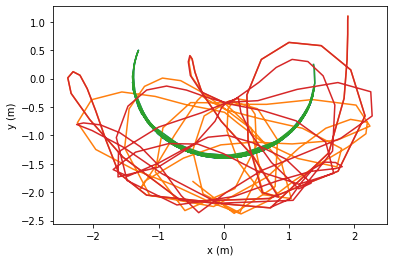

In [56]:
for i in range(N):
    plt.plot(x1i[i],y1i[i])
    plt.plot(x2i[i],y2i[i])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.legend()

In [ ]:
fig = plt.figure()
ax = plt.axes(xlim=(-l1-l2-0.5, l1+l2+0.5), ylim=(-l1-l2-0.5, l1+l2+0.5))
plt.text(l1+l2-1.5,l1+l2-0.5,'m1 : {} and m2 : {}'.format(m1,m2))
plt.text(l1+l2-1.5,l1+l2-0.85,'l1 : {} and l2 : {}'.format(l1,l2))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")

line11, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 1
line12, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 2
line13, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass1 case 3

line21, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 1
line22, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 2
line23, = ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k')   # line for mass2 case 3

line31, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line32, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line33, = ax.plot([], [], color='k', linestyle='-', linewidth=2)

line41, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line42, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
line43, = ax.plot([], [], color='k', linestyle='-', linewidth=2)

line51, = ax.plot([], [], 'o', color='k', markersize = 10)
line52, = ax.plot([], [], 'o', color='k', markersize = 10)
line53, = ax.plot([], [], 'o', color='k', markersize = 10) 

time_template = 'Time = %.1f s'
time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

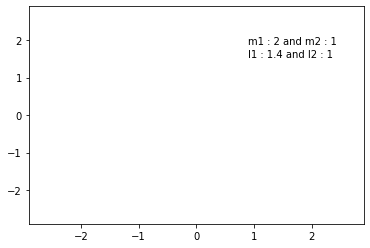

In [79]:
fig = plt.figure()
ax = plt.axes(xlim=(-l1-l2-0.5, l1+l2+0.5), ylim=(-l1-l2-0.5, l1+l2+0.5))
plt.text(l1+l2-1.5,l1+l2-0.5,'m1 : {} and m2 : {}'.format(m1,m2))
plt.text(l1+l2-1.5,l1+l2-0.85,'l1 : {} and l2 : {}'.format(l1,l2))
# animation function.  This is called sequentially
def test_animate(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = 10             # length of motion trail of weight 1 
    trail2 = 10              # length of motion trail of weight 2
    
    dt = t[2]-t[1]          # time step
    
    for j in range(N):
        ##############################################
        # marker + line of first weight
        line1,=ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2,\
                markevery=10000, markeredgecolor = 'k')   # line for mass1 case 1
        line1.set_data(x1i[j][i:max(1,i-trail1):-1], y1i[j][i:max(1,i-trail1):-1])
        #########################################################
    
    for j in range(N):
        # marker + line of the second weight 
        line2, = ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2,\
                          markevery=10000, markeredgecolor = 'k')   # line for mass1 case 2
        line2.set_data(x2i[j][i:max(1,i-trail2):-1], y2i[j][i:max(1,i-trail2):-1])  
        
        #######################################################################
    for j in range(N):
        # line connecting weight 2 to weight 1
        line3, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
        line3.set_data([x1i[j][i], x2i[j][i]], [y1i[j][i], y2i[j][i]])
        ########################################################################
    for j in range(N):
        # line connecting origin to weight 1 
        line4, = ax.plot([], [], color='k', linestyle='-', linewidth=2)
        line4.set_data([x1i[j][i], 0], [y1i[j][i],0]) 
        #######################################################3
    for j in range(N):
        line5, = ax.plot([], [], 'o', color='k', markersize = 10)
        line5.set_data([0, 0], [0, 0])
    for j in range(N):
        time_string.set_text(time_template % (i*dt))
    ###################################
    f=(line3, line4,line5,line1, line2, time_string)
    return  f

In [80]:
t=ti[0]
Nt=len(t)
anim = animation.FuncAnimation(fig, test_animate, init_func=None,
                               frames=Nt, interval=1000*(t[2]-t[1])*0.8, blit=True)

# Comment out the following lines if you do not want to save the animation to file
#anim.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('testing_N_pendulum_animation_final_2_full_trail.gif', fps=1.0/(t[2]-t[1]), writer = 'pillow')

plt.show()

In [70]:
ti[0]

array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,
        2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,
        4.4,  4.6,  4.8,  5. ,  5.2,  5.4,  5.6,  5.8,  6. ,  6.2,  6.4,
        6.6,  6.8,  7. ,  7.2,  7.4,  7.6,  7.8,  8. ,  8.2,  8.4,  8.6,
        8.8,  9. ,  9.2,  9.4,  9.6,  9.8, 10. , 10.2, 10.4, 10.6, 10.8,
       11. , 11.2, 11.4, 11.6, 11.8, 12. , 12.2, 12.4, 12.6, 12.8, 13. ,
       13.2, 13.4, 13.6, 13.8, 14. , 14.2, 14.4, 14.6, 14.8, 15. , 15.2,
       15.4, 15.6, 15.8, 16. , 16.2, 16.4, 16.6, 16.8, 17. , 17.2, 17.4,
       17.6, 17.8, 18. , 18.2, 18.4, 18.6, 18.8, 19. , 19.2, 19.4, 19.6,
       19.8, 20. , 20.2, 20.4, 20.6, 20.8, 21. , 21.2, 21.4, 21.6, 21.8,
       22. , 22.2, 22.4, 22.6, 22.8, 23. , 23.2, 23.4, 23.6, 23.8, 24. ,
       24.2, 24.4, 24.6, 24.8, 25. ])

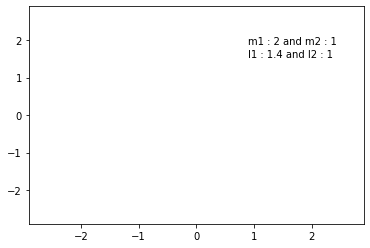

In [83]:
fig = plt.figure()
ax = plt.axes(xlim=(-l1-l2-0.5, l1+l2+0.5), ylim=(-l1-l2-0.5, l1+l2+0.5))
plt.text(l1+l2-1.5,l1+l2-0.5,'m1 : {} and m2 : {}'.format(m1,m2))
plt.text(l1+l2-1.5,l1+l2-0.85,'l1 : {} and l2 : {}'.format(l1,l2))
#line, = ax.plot([], [], lw=2,,markersize = 9, markerfacecolor = "#FDB813",markeredgecolor ="#FD7813")
Line1=[]
Line2=[]
Line3=[]
Line4=[]
Line5=[]

for i in range(N):
    Line1.append(ax.plot([], [], 'o-',color = '#d2eeff',markersize = 12, markerfacecolor = '#0077BE',lw=2, markevery=10000, markeredgecolor = 'k'))  # line for mass1 case 1

    Line2.append(ax.plot([], [], 'o-',color = '#ffebd8',markersize = 12, markerfacecolor = '#f66338',lw=2, markevery=10000, markeredgecolor = 'k') )  # line for mass2 case 1

    Line3.append(ax.plot([], [], color='k', linestyle='-', linewidth=2))

    Line4.append( ax.plot([], [], color='k', linestyle='-', linewidth=2))

    Line5.append(ax.plot([], [], 'o', color='k', markersize = 10))
    time_template = 'Time = %.1f s'
    time_string = ax.text(0.05, 0.9, '', transform=ax.transAxes)

In [89]:
type(Line1[0][1])

IndexError: list index out of range

In [90]:
# animation function.  This is called sequentially
t=ti[0]
def animate(i):
    # Motion trail sizes. Defined in terms of indices. Length will vary with the time step, dt. E.g. 5 indices will span a lower distance if the time step is reduced.
    trail1 = 10             # length of motion trail of weight 1 
    trail2 = 10              # length of motion trail of weight 2
    
    dt = t[2]-t[1]          # time step
    # marker + line of first weight
    for j in range(N):
        ##############################################
        # marker + line of first weight
        Line1[j][0].set_data(x1i[j][i:max(1,i-trail1):-1], y1i[j][i:max(1,i-trail1):-1])
        #########################################################
    
    for j in range(N):
        # marker + line of the second weight 
        
        Line2[j][0].set_data(x2i[j][i:max(1,i-trail2):-1], y2i[j][i:max(1,i-trail2):-1])  
        
        #######################################################################
    for j in range(N):
        # line connecting weight 2 to weight 1
       
        Line3[j][0].set_data([x1i[j][i], x2i[j][i]], [y1i[j][i], y2i[j][i]])
        ########################################################################
    for j in range(N):
        # line connecting origin to weight 1 
       
        Line4[j][0].set_data([x1i[j][i], 0], [y1i[j][i],0]) 
        #######################################################3
    for j in range(N):
      
        Line5[j][0].set_data([0, 0], [0, 0])
    #******
    time_string.set_text(time_template % (i*dt))
    ###################################
    F=[]
    for j in range(N):
        F.append((Line3[j][0], Line4[j][0],Line5[j][0],Line1[j][0], Line2[j][0], time_string))
    f=F[0]
    return  f

In [91]:
t=ti[0]
Nt=len(t)
anim = animation.FuncAnimation(fig, animate, init_func=None,
                               frames=Nt, interval=1000*(t[2]-t[1])*0.8, blit=True)

# Comment out the following lines if you do not want to save the animation to file
#anim.save('double_pendulum_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('testing_N_pendulum_animation_final_3.gif', fps=1.0/(t[2]-t[1]), writer = 'pillow')

plt.show()